In [1]:
import numpy as np


class Lorentz:
    def __init__(self, s = 10, r = 28, b = 8/3):
        self.s = s
        self.r = r
        self.b = b

    # Differential equations of a Lorenz System
    def X(self, x, y, s):
        return s * (y - x)

    def Y(self, x, y, z, r):
        return (-x) * z + r * x - y

    def Z(self, x, y, z, b):
        return x * y - b * z

    # RK4 for the differential equations
    def RK4(self, x, y, z, s, r, b, dt):
        k_1 = self.X(x, y, s)
        l_1 = self.Y(x, y, z, r)
        m_1 = self.Z(x, y, z, b)

        k_2 = self.X((x + k_1 * dt * 0.5), (y + l_1 * dt * 0.5), s)
        l_2 = self.Y((x + k_1 * dt * 0.5), (y + l_1 * dt * 0.5), (z + m_1 * dt * 0.5), r)
        m_2 = self.Z((x + k_1 * dt * 0.5), (y + l_1 * dt * 0.5), (z + m_1 * dt * 0.5), b)

        k_3 = self.X((x + k_2 * dt * 0.5), (y + l_2 * dt * 0.5), s)
        l_3 = self.Y((x + k_2 * dt * 0.5), (y + l_2 * dt * 0.5), (z + m_2 * dt * 0.5), r)
        m_3 = self.Z((x + k_2 * dt * 0.5), (y + l_2 * dt * 0.5), (z + m_2 * dt * 0.5), b)

        k_4 = self.X((x + k_3 * dt), (y + l_3 * dt), s)
        l_4 = self.Y((x + k_3 * dt), (y + l_3 * dt), (z + m_3 * dt), r)
        m_4 = self.Z((x + k_3 * dt), (y + l_3 * dt), (z + m_3 * dt), b)

        x += (k_1 + 2 * k_2 + 2 * k_3 + k_4) * dt * (1/6)
        y += (l_1 + 2 * l_2 + 2 * l_3 + l_4) * dt * (1/6)
        z += (m_1 + 2 * m_2 + 2 * m_3 + m_4) * dt * (1/6)

        return (x, y, z)

    def generate(self, dt, steps):
        # Initial values and Parameters
        x_0, y_0, z_0 = 1, 1, 1

        # RK4 iteration
        x_list = [x_0]
        y_list = [y_0]
        z_list = [z_0]

        i = 0

        while i < steps:
            x = x_list[i]
            y = y_list[i]
            z = z_list[i]

            position = self.RK4(x, y, z, self.s, self.r, self.b, dt)
            x_list.append(position[0])
            y_list.append(position[1])
            z_list.append(position[2])

            i += 1

        x_array = np.array(x_list)
        y_array = np.array(y_list)
        z_array = np.array(z_list)

        return x_array, y_array, z_array
def normalize(arr):
    return (arr - arr.min()) / (arr.max() - arr.min())

def denormalize(arr, min, max):
    return arr * (max - min) + min

N = 10000
x, _, _ = Lorentz().generate(0.1, N - 1)

x_max = x.max()
x_min = x.min()
x = normalize(x)
print(x)
print(len(x))

[0.52356996 0.55805846 0.67809835 ... 0.51981119 0.55134232 0.63545381]
10000


In [2]:
import random
from itertools import product

Kmax = 20
L = 2

patterns = list(product(range(1, Kmax + 1), repeat=L-1))
pattern = random.choice(patterns)
pref = np.cumsum([0] + list(pattern))

T = len(x) // 2
seqs = [tuple([i + e for e in pref]) for i in range(T - sum(pattern))]
seqs


[(np.int64(0), np.int64(15)),
 (np.int64(1), np.int64(16)),
 (np.int64(2), np.int64(17)),
 (np.int64(3), np.int64(18)),
 (np.int64(4), np.int64(19)),
 (np.int64(5), np.int64(20)),
 (np.int64(6), np.int64(21)),
 (np.int64(7), np.int64(22)),
 (np.int64(8), np.int64(23)),
 (np.int64(9), np.int64(24)),
 (np.int64(10), np.int64(25)),
 (np.int64(11), np.int64(26)),
 (np.int64(12), np.int64(27)),
 (np.int64(13), np.int64(28)),
 (np.int64(14), np.int64(29)),
 (np.int64(15), np.int64(30)),
 (np.int64(16), np.int64(31)),
 (np.int64(17), np.int64(32)),
 (np.int64(18), np.int64(33)),
 (np.int64(19), np.int64(34)),
 (np.int64(20), np.int64(35)),
 (np.int64(21), np.int64(36)),
 (np.int64(22), np.int64(37)),
 (np.int64(23), np.int64(38)),
 (np.int64(24), np.int64(39)),
 (np.int64(25), np.int64(40)),
 (np.int64(26), np.int64(41)),
 (np.int64(27), np.int64(42)),
 (np.int64(28), np.int64(43)),
 (np.int64(29), np.int64(44)),
 (np.int64(30), np.int64(45)),
 (np.int64(31), np.int64(46)),
 (np.int64(32), np

In [3]:
from math import pi, factorial

samples = np.array([[x[i] for i in e] for e in seqs])

#print(samples[:, np.newaxis, :])
#print('------1---')
#print(samples[np.newaxis, :, :])
#print('------2---')
#print(samples[:, np.newaxis, :] - samples[np.newaxis, :, :])
#print('------3---')

distances = np.linalg.norm(samples[:, np.newaxis, :] - samples[np.newaxis, :, :], axis=2)
sorted_distances = np.sort(distances, axis=1)
argsorted_distances = np.argsort(distances, axis=1)

r = 5
mu = 0.2
r_nearest_distances = sorted_distances[:, r]
ordered = np.argsort(r_nearest_distances)

def double_factorial(n):
    if n <= 1:
        return 1
    return n * double_factorial(n - 2)

def get_volume_coefficient(L: int):
    if L % 2 == 0:
        return pi ** (L // 2) / factorial((L // 2))
    return 2 ** (L // 2 + 1) * pi ** (L // 2) / double_factorial(L)

VOLUME_CONST = get_volume_coefficient(L)

def L_dimensional_volume(arr):
    return arr ** L * VOLUME_CONST


#print(r_nearest_distances)
#print(ordered)
#print(np.sort(r_nearest_distances))
#print(r_nearest_distances[ordered])

sz = len(seqs)

#print(r_nearest_distances)
p = r / (L_dimensional_volume(r_nearest_distances) * sz)
#print(list(p))


In [4]:
w = np.array([-1] * sz)
completed = np.array([False] * sz)
clusters = [[] for _ in range(sz)]
#significant = np.array([False] * sz)

def is_significant(index: int):
    if not clusters[index]:
        return False
    if completed[index]:
        return True
    current_cluster = p[np.array(clusters[index])]
    return np.max(np.abs(current_cluster[:, np.newaxis] - current_cluster[np.newaxis, :])) >= mu

ind = 1
for q in ordered:
    nei = argsorted_distances[q, 1:r + 1]
    w_nei = w[nei]
    cs = np.unique(w_nei[w_nei != -1])
    if cs.size == 0:  # not connected to clusters
        w[q] = ind
        clusters[ind].append(q)
        ind += 1
        continue
    cs = cs[~completed[cs]]
    if cs.size == 0:  # all clusters are completed
        w[q] = 0
        clusters[0].append(q)
        continue
    significant = np.array([is_significant(e) for e in cs])
    k = np.sum(significant)
    if k > 1 or cs[0] == 0:
        w[q] = 0
        completed[cs[significant]] = True
        #w[cs[~significant]] = -1
    else:
        for e in cs[1:]:
            clusters[cs[0]] += clusters[e]
        clusters[cs[0]].append(q)
        w[np.isin(w, cs)] = cs[0]
        w[q] = cs[0]

resulting_clusters = np.unique(w)
clst = []
for i in resulting_clusters:
    clst.append(samples[np.array(clusters[i])])
clst_indexes = []
for i in resulting_clusters:
    clst_indexes.append(np.array(clusters[i]))
print(resulting_clusters)
for e in clst[:5]:
    print(e)

[  0   1   2   3   4   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  31  32  33  34  35  36  38
  39  40  42  43  44  45  46  48  49  50  51  52  53  54  55  56  58  61
  62  63  64  65  66  69  70  72  73  74  75  76  77  78  79  80  81  82
  84  85  86  87  88  89  90  92  93  94  95  97  98 100 101 102 103 104
 106 108 109 110 112 113 115 116 117 118 119 120 122 123 124 125 126 127
 128 130 131 133 134 135 137 138 139 140 141 142 143 145 146 147 148 149
 150 151 153 154 155 156 157 158 160 161 162 163 164 165 166 167 169 170
 171 174 176 177 180 181 182 183 184 185 186 187 188 189 191 192 193 194
 195 196 197 198 199 200 201 202 203 204 206 207 209 210 211 212 214 215
 216 217 219 221 222 223 225 226 227 230 232 233 235 236 237 238 240 241
 242 243 245 246 247 248 249 251 252 254 255 256 257 259 260 261 262 263
 265 267 268 270 271 272 273 274 275 276 277 278 279 280 282 284 285 286
 287 288 289 290 292 294 295 297 298 299 300 301 30

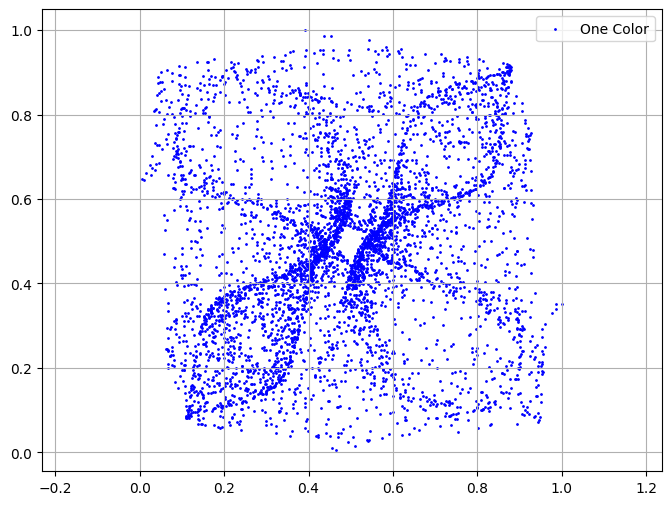

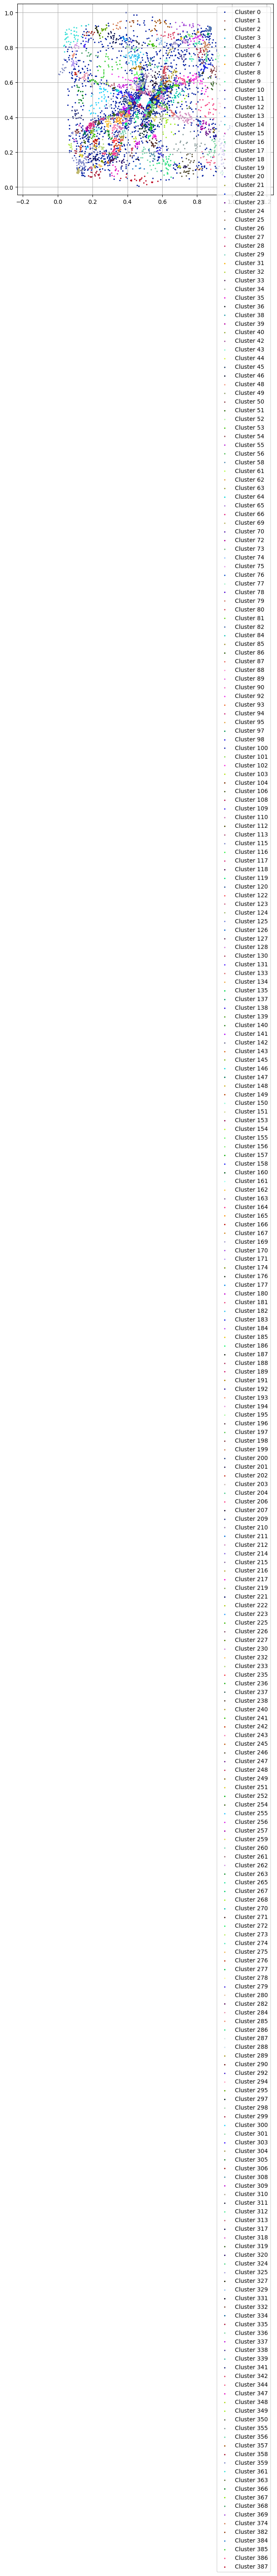

In [5]:
import matplotlib.pyplot as plt

X, Y = samples[:, 0], samples[:, 1]

plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', label="One Color", s=1)
plt.grid()
plt.axis("equal")
plt.legend()
plt.show()


unique_groups = np.unique(resulting_clusters)
random_colors = np.random.rand(max(unique_groups) + 1, 3)

plt.figure(figsize=(8, 6))
for index, i in enumerate(unique_groups):
    plt.scatter(X[clst_indexes[index]], Y[clst_indexes[index]], color=random_colors[i], s=2, label=f"Cluster {i}")

plt.grid()
plt.axis("equal")
plt.legend()
plt.show()

